In [1]:
# Importing the required libararies

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.compat.v1 import InteractiveSession
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# function to read a csv data

def get_data(filename):
    
    ndata = np.loadtxt(filename, delimiter = ',')

    labels = ndata[:,0].astype(int)
    images = ndata[:,1:].astype(float).reshape((ndata.shape[0],28,28))
    ndata = None
    return images, labels


trainfile = f"{os.getcwd()}/mnist_train.csv"
testfile = f"{os.getcwd()}/mnist_test.csv"

print(trainfile)

training_images, training_labels = get_data(trainfile)
testing_images, testing_labels = get_data(testfile)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(training_labels.shape)

/tf/Deeplearning/MNIST multiclass classifier/mnist_train.csv
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(60000,)


In [3]:
#expand dims for tf image tensors

training_images = np.expand_dims(training_images, axis = -1)
testing_images = np.expand_dims(testing_images, axis = -1)
testing_images = (testing_images/255.0).astype(float)
training_images = (training_images/255.0).astype(float)




In [4]:
#define a Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





In [5]:
r = model.fit(training_images, training_labels, validation_split=0.1, epochs = 3)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 6s 103us/sample - loss: 0.1094 - accuracy: 0.9667 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 2/3
54000/54000 [==============================] - 4s 78us/sample - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0392 - val_accuracy: 0.9895
Epoch 3/3
54000/54000 [==============================] - 4s 79us/sample - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0373 - val_accuracy: 0.9895


In [6]:
model.evaluate(testing_images, testing_labels)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0290 - accuracy: 0.9899


[0.02899866473756847, 0.9899]

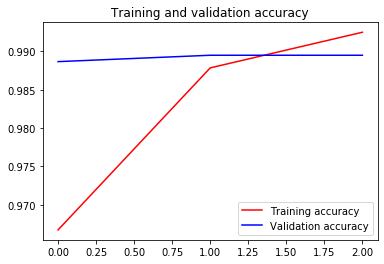

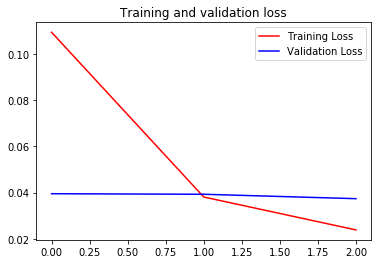

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = r.history['accuracy']
loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()